In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator  # pylint: disable=import-error, no-name-in-module
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer

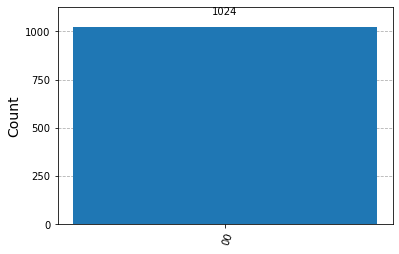

In [2]:
## The classical way
qc_alice = QuantumCircuit(2, 2)
MESSAGE = '00'
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)
qc_alice.draw(output="latex")
# Bob measures
qc_bob = QuantumCircuit(2,2)
qc_bob.measure([0,1],[0,1])
backend = Aer.get_backend('aer_simulator')
plot_histogram(backend.run(qc_alice.compose(qc_bob)).result().get_counts())

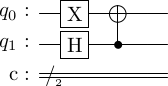

In [12]:
## Another way
qc_alice = QuantumCircuit(2, 2)
MESSAGE = '01'
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)
qc_alice.h(1)
qc_alice.cx(1,0)
qc_alice.draw(output="latex")

In [13]:
ket = Statevector(qc_alice)
ket.draw(output="latex")
#plot_histogram(backend.run(qc_alice).result().get_counts())

QiskitError: 'No counts for experiment "0"'

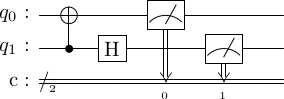

In [7]:
qc_bob = QuantumCircuit(2,2)
# Bob disentangles
qc_bob.cx(1,0)
qc_bob.h(1)
# Then measures
qc_bob.measure([0,1],[0,1])

qc_bob.draw(output="latex")

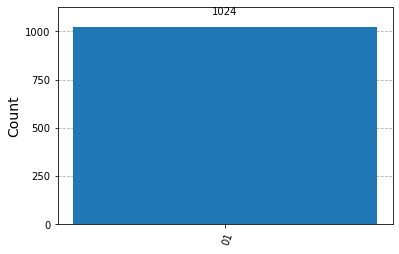

In [8]:
plot_histogram(backend.run(qc_alice.compose(qc_bob)).result().get_counts())

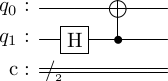

In [20]:
## The entangled way
qc_charlie = QuantumCircuit(2,2)

qc_charlie.h(1)
qc_charlie.cx(1,0)

qc_charlie.draw(output="latex")

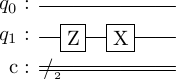

In [19]:


MESSAGE = '11'

qc_alice = QuantumCircuit(2,2)

if MESSAGE[-2]=='1':
    qc_alice.z(1)
if MESSAGE[-1]=='1':
    qc_alice.x(1)
qc_alice.draw(output="latex")

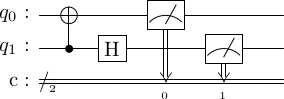

In [18]:
qc_bob = QuantumCircuit(2,2)
# Bob disentangles
qc_bob.cx(1,0)
qc_bob.h(1)
# Then measures
qc_bob.measure([0,1],[0,1])

qc_bob.draw(output="latex")

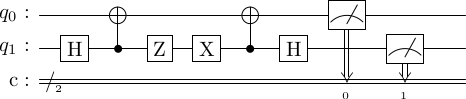

In [21]:
complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
complete_qc.draw(output="latex")

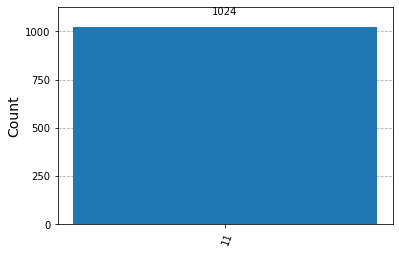

In [22]:
plot_histogram(backend.run(complete_qc).result().get_counts())